# Introduction to neural networks

## Neural networks and iris flowers

Many machine learning prediction problems are rooted in complex data and its non-linear relationships between features. Neural networks are a class of models that can learn these non-linear interactions between variables.<br>

We will introduce neural networks by predicting the species of iris flowers from data with the following features:

* `sepal_length` - Continuous variable measured in centimeters.
* `sepal_width` - Continuous variable measured in centimeters.
* `petal_length` - Continuous variable measured in centimeters.
* `petal_width` - Continuous variable measured in centimeters.
* `species` - Categorical. 2 species of iris flowers, Iris-virginica or Iris-versicolor.

The DataFrame class includes a `hist()` method which creates a histogram for every numeric column in that DataFrame. The histograms are generated using [Matplotlib](http://matplotlib.org/api/pyplot_api.html) and displayed using `plt.show()`.

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in dataset
iris = pandas.read_csv("data/iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())

    sepal_length  sepal_width  petal_length  petal_width          species
74           6.7          3.3           5.7          2.1   Iris-virginica
2            6.9          3.1           4.9          1.5  Iris-versicolor
31           5.5          2.4           3.7          1.0  Iris-versicolor
99           5.9          3.0           5.1          1.8   Iris-virginica
14           5.6          2.9           3.6          1.3  Iris-versicolor
['Iris-virginica' 'Iris-versicolor']


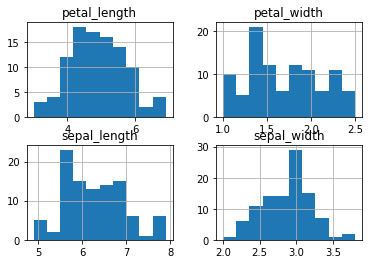

In [3]:
iris.hist();plt.show()

## Neurons

So far we have talked about methods which do not allow for a large amount of non-linearity. For example, in the two dimensional case shown below, we want to find a function that can cleanly separate the X's from the O's.

![https://dq-content.s3.amazonaws.com/l92oKZd.png](https://dq-content.s3.amazonaws.com/l92oKZd.png)

Neither a linear model nor logistic model is capable of building such a function, so we must explore other options like neural networks. Neural networks are very loosely inspired by the structure of neurons in the human brain. These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output. Below we see a representation of a neuron.

![https://dq-content.s3.amazonaws.com/RdPPxre.png](https://dq-content.s3.amazonaws.com/RdPPxre.png)

This neuron is taking in 5 units represented as `x`, a bias unit, and `4` features. This bias unit ($1$) is similar in concept to the intercept in linear regression and it will shift the activity of the neuron to one direction or the other. These units are then fed into an activation function `h`. We will use the popular sigmoid (logistic) activation function because it returns values between 0 and 1 and can be treated as probabilities.

$$\text{Sigmoid Function: }g(z) = \dfrac{1}{1 + e^{-z}}$$

This sigmoid function then leads to the corresponding activation function:

$$\text{Sigmoid Activation Function: }h_{\Theta}(x) = \dfrac{1}{1+e^{-\Theta^T x}} = \dfrac{1}{1+e^{-(\theta_01 + \theta_1x_1 + \theta_2 x_2)}}$$

If you look closely, you might notice that the logistic regression function we learned in previous lessons can be represented here as a neuron.

In [4]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication
# z is 1x3 and y is 1x3,  z * y.T is then 1x1
print(np.dot(z,y.T))

# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))

[[17]]


In [5]:
def sigmoid_activation(x0, theta_init):
    return (1 + np.exp(-(np.dot(theta_init.T, x0))))**(-1)
    
a1 = sigmoid_activation(x0, theta_init)
a1

array([ 0.51462261])

## Cost function

We can train a single neuron as a two layer network using gradient descent. As we learned in the previous mission, we need to minimize a cost function which measures the error in our model. The cost function measures the difference between the desired output and actual output, defined as:

$$J(\Theta) = -\dfrac{1}{m} \sum_{i=1}^{m} (y_i * log(h_{\Theta}(x_i)) + (1-y_i) log(1-h_{\Theta}(x_i)))$$

Since our targets, $y_i$, are binary, either $y_i$ or $(1−y_i)$ will equal zero. One of the terms in the summation will disappear because of this result and. the activation function is then used to compute the error. For example, if we observe a true target, $y_i=1$, then we want $h_{\Theta}(x_i)$ to also be close to $1$. So as $h_{\Theta}(x_i)$ approaches $1$, the $log(h_{\Theta}(x_i))$ becomes very close to 0. Since the log of a value between $0$ and $1$ is negative, we must take the negative of the entire summation to compute the cost. The parameters are randomly initialized using a normal random variable with a small variance, less than 0.1.

Write a function, `singlecost()`, that can compute the cost from just a single observation.
* This function should use input features `X`, targets `y`, and parameters `theta` to compute the cost function.
* Assign the cost of variables `x0`, `y0`, and `theta_init` to variable `first_cost`.

In [6]:
# First observation's features and target
x0 = X[0]
y0 = y[0]

# Initialize parameters, we have 5 units and just 1 layer
theta_init = np.random.normal(0,0.01,size=(5,1))

In [17]:
def singlecost(X, y, theta):
    # Compute activation
    h = sigmoid_activation(X.T, theta)
    
    # Take the negative average of target*log(activation) + (1-target) * log(1-activation)
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    
    return cost

first_cost = singlecost(x0, y0, theta_init)
first_cost

0.8047423557766058

## Compute the Gradients

In the previous mission we learned that we need to compute the partial derivatives of the cost function to get the gradients. Calculating derivatives are more complicated in neural networks than in linear regression. Here we must compute the overall error and then distribute that error to each parameter. Compute the derivative using the chain rule.

$$\dfrac{\partial J}{\partial \theta_j} = \dfrac{\partial J}{\partial h(\Theta)} \dfrac{\partial h(\Theta)}{\partial \theta_j}$$

This rule may look complicated, but we can break it down. The first part is computing the error between the target variable and prediction. The second part then computes the sensitivity relative to each parameter. In the end, the gradients are computed as: 

$$\\delta = (y_i - h_\Theta(x_i)) * h_\Theta(x_i) * (1-h_\Theta(x_i)) * x_i$$

Now we will step through the math. $(y_i - h_\Theta(x_i))$ is a scalar and the error between our target and prediction. $h_\Theta(x_i) * (1-h_\Theta(x_i))$ is also a scalar and the sensitivity of the activation function. $x_i$ is the features for our observation i. $\delta$ is then a vector of length 5, 4 features plus a bias unit, corresponding to the gradients.<br>

To implement this, we compute $\delta$ for each observation, then average to get the average gradient. The average gradient is then used to update the corresponding parameters.

In [27]:
# Initialize parameters
theta_init = np.random.normal(0,0.01,size=(5,1))

# Store the updates into this array
grads = np.zeros(theta_init.shape)

# Number of observations 
n = X.shape[0]

In [29]:
for obs in range(X.shape[0]):
    
    x_ = X[obs, :]
    y_ = y[obs]
    h_ = sigmoid_activation(x_.T, theta_init)
    delta_ = (y_ - h_)*h_*(1 - h_)*x_
    
    grads += delta_[:, np.newaxis]/X.shape[0]

grads

array([[ 0.00390202],
       [-0.01594007],
       [-0.00137798],
       [-0.06104472],
       [-0.03691039]])

## Two layer network

Now that you can compute the gradients, use gradient descent to learn the parameters and predict the `species` of iris flower given the 4 features. Gradient descent minimizes the cost function by adjusting the parameters accordingly. Adjust the parameters by adding the product of the gradients and the learning rate from the previous parameters. Repeat until the cost function converges or a maximum number of iterations is reached.

The high level algorithm is,

```python

while (number_of_iterations < max_iterations and (prev_cost - cost) > convergence_thres ) {
    update paramaters
    get new cost
    repeat
}

```

We have implemented all these pieces in a single function learn() that can learn this two layer network. After setting a few initial variables, we begin to iterate until convergence. During each iteration we compute our gradients, update accordingly, and compute the new cost.


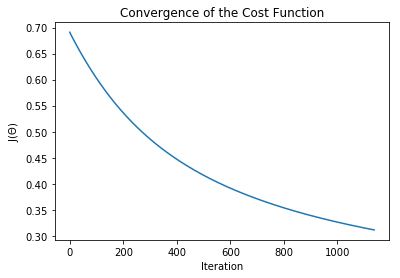

In [30]:
theta_init = np.random.normal(0,0.01,size=(5,1))

# set a learning rate
learning_rate = 0.1
# maximum number of iterations for gradient descent
maxepochs = 10000       
# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = singlecost(X, y, theta)  # compute initial cost
    costprev = cost + convergence_thres + 0.01  # set an inital costprev to past while loop
    counter = 0  # add a counter
    
    # Loop through until convergence
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta)   # Compute activation
            delta = (y[j]-h) * h * (1-h) * obs   # Get delta
            grads += delta[:,np.newaxis]/X.shape[0]  # accumulate
        
        # update parameters 
        theta += grads * learning_rate
        counter += 1  # count
        costprev = cost  # store prev cost
        cost = singlecost(X, y, theta) # compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta
        
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

## Neural Network

Neural networks are usually built using multiple layers of neurons. Adding more layers into the network allows you to learn more complex functions. Here's a picture representing a 3 layer neural network.

![https://dq-content.s3.amazonaws.com/J1Y6YEf.png](https://dq-content.s3.amazonaws.com/J1Y6YEf.png)

We have a 3 layer neural network with four input variables $x_1, x_2, x_3,\text{ and } x_4$ and a bias unit. Each variable and bias unit is then sent to four hidden units, $a_1^{(2)}, a_2^{(2)}, a_3^{(2)}, \text{ and } a_4^{(2)}$. The hidden units have different sets of parameters $\theta$.

$$a_1^{(2)} = g(\theta_{1,0}^{(1)} + \theta_{1,1}^{(1)} x_1 + \theta_{1,2}^{(1)} x_2 + \theta_{1,3}^{(1)} x_3 + \theta_{1,4}^{(1)} x_4)$$
$$a_2^{(2)} = g(\theta_{2,0}^{(1)} + \theta_{2,1}^{(1)} x_1 + \theta_{2,2}^{(1)} x_2 + \theta_{2,3}^{(1)} x_3 + \theta_{2,4}^{(1)} x_4)$$
$$a_3^{(2)} = g(\theta_{3,0}^{(1)} + \theta_{3,1}^{(1)} x_1 + \theta_{3,2}^{(1)} x_2 + \theta_{3,3}^{(1)} x_3 + \theta_{3,4}^{(1)} x_4)$$
$$a_4^{(2)} = g(\theta_{4,0}^{(1)} + \theta_{4,1}^{(1)} x_1 + \theta_{4,2}^{(1)} x_2 + \theta_{4,3}^{(1)} x_3 + \theta_{4,4}^{(1)} x_4)$$

$\theta_{i,k}^{(j)}$ represents the parameter of input unit $k$ which transform the units in layer $j$ to activation unit $a_{i}^{(j+1)}$.<br>

This layer is known as a hidden layer because the user does not directly interact with it by passing or retrieving data. The third and final layer is the output, or prediction, of our model. Similar to how each variable was sent to each neuron in the hidden layer, the activation units in each neuron are then sent to each neuron on the next layer. Since there is only a single layer, we can write it as:


While the mathematical notation may seem confusing at first, at a high level, we are organizing multiple logistic regression models to create a more complex function.
